<a href="https://colab.research.google.com/github/riteshchandra122/Elevate-Task4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load
df = pd.read_csv("data.csv")

# Quick look
print(df.head())
print(df.info())
print(df.describe())
print(df['diagnosis'].value_counts())   # “diagnosis” is usually the target column


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
# Drop ID
df = df.drop(["id", "Unnamed: 32"], axis=1, errors="ignore")

# Map diagnosis to numeric
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)  # increase max_iter in case of convergence issues
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability for class “1” (malignant)


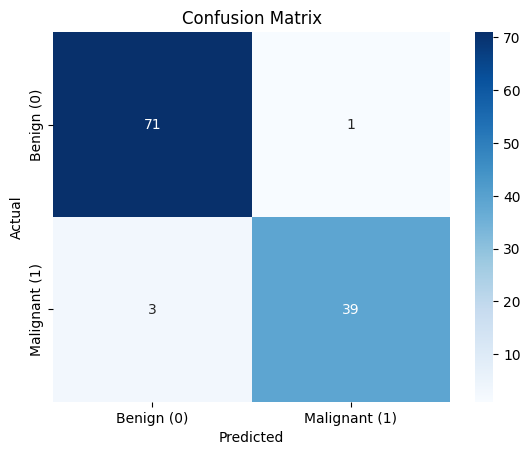

Precision: 0.975
Recall: 0.9285714285714286
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.996031746031746


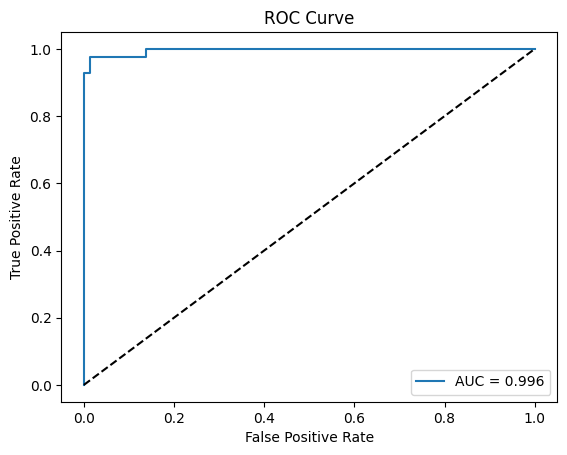

In [7]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision, recall
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print("Precision:", prec)
print("Recall:", rec)

# Classification report
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC:", auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [8]:
import numpy as np

thresholds_to_try = np.linspace(0.1, 0.9, 9)
results = []
for t in thresholds_to_try:
    y_pred_t = (y_pred_prob >= t).astype(int)
    prec_t = precision_score(y_test, y_pred_t)
    rec_t = recall_score(y_test, y_pred_t)
    results.append((t, prec_t, rec_t))

# Display
for t, p, r in results:
    print(f"Threshold = {t:.2f} → Precision = {p:.3f}, Recall = {r:.3f}")


Threshold = 0.10 → Precision = 0.891, Recall = 0.976
Threshold = 0.20 → Precision = 0.911, Recall = 0.976
Threshold = 0.30 → Precision = 0.976, Recall = 0.976
Threshold = 0.40 → Precision = 0.976, Recall = 0.952
Threshold = 0.50 → Precision = 0.975, Recall = 0.929
Threshold = 0.60 → Precision = 1.000, Recall = 0.905
Threshold = 0.70 → Precision = 1.000, Recall = 0.905
Threshold = 0.80 → Precision = 1.000, Recall = 0.857
Threshold = 0.90 → Precision = 1.000, Recall = 0.786


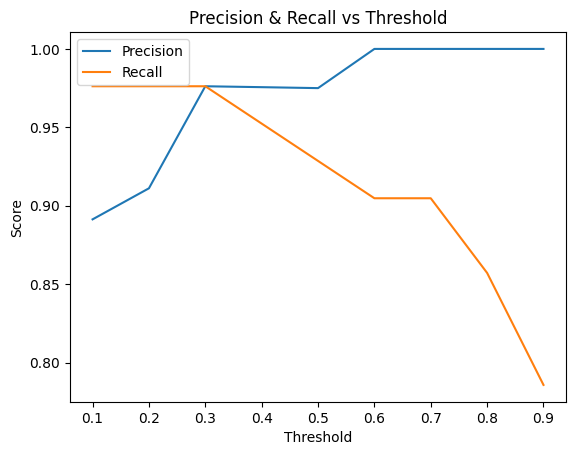

In [9]:
# From above loop results
ths = [r[0] for r in results]
precisions = [r[1] for r in results]
recalls = [r[2] for r in results]

plt.plot(ths, precisions, label="Precision")
plt.plot(ths, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.show()
